# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename) # YOUR CODE HERE
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

## Problem: Grouping Airbnb Listings by Similar Characteristics.   
**Dataset**  
I have chosen the Airbnb NYC listings.  

**Overview**   
This is an unsupervised learning, or a clustering, problem.  

**Objective**   
To group Airbnb listings in New York City based on similar features to identify distinct types of accommodations. This can help AirBnB understand the nature of New York City listings. For example, it can improve their ability to show potential guests meaningful alternative listings to perhaps, a preferred one which is unavailable; drive targeted marketing and personalized recommendation; and help them assist hosts in understanding the competitive landscape.

**Features**  
I am selecting features from the dataset I believe can reflect meaningful similarity between listings  

* accommodates: Number of guests the listing can accommodate.  
* host_is_superhost: Whether the host is a superhost
* host_response_rate:  The rate the host responds to inquirers.
* minimum_nights: Minimum number of nights for booking.  
* price: The price per night.  
* review_scores_rating: Overall rating score of the listing.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

---
I will begin by selecting features so the dataset I have to clean and explore is more manageable.

In [4]:
# YOUR CODE HERE
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [5]:
selected_features = ['accommodates', 'host_is_superhost', 'host_response_rate', 'minimum_nights', 'price', 'review_scores_rating']
df_selected = df[selected_features]
df_selected.head()

,accommodates,host_is_superhost,host_response_rate,minimum_nights,price,review_scores_rating
0,1,True,0.80,30,150.0,4.70
1,3,True,0.09,1,75.0,4.45
2,4,True,1.00,5,275.0,5.00
3,2,True,1.00,2,68.0,4.21
4,1,True,NaN,2,75.0,4.91


**Missing Values**

In [6]:
df_selected.isnull().sum()

accommodates                0
host_is_superhost           0
host_response_rate      11843
minimum_nights              0
price                       0
review_scores_rating        0
dtype: int64

In [7]:
# Handle missing values with the mean, in host_response_rate
df_selected['host_response_rate'] = df_selected['host_response_rate'].fillna(df_selected['host_response_rate'].mean())

/tmp/ipykernel_1786/3824103377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['host_response_rate'] = df_selected['host_response_rate'].fillna(df_selected['host_response_rate'].mean())


In [8]:
df_selected.isnull().sum()

accommodates            0
host_is_superhost       0
host_response_rate      0
minimum_nights          0
price                   0
review_scores_rating    0
dtype: int64

**Outliers**

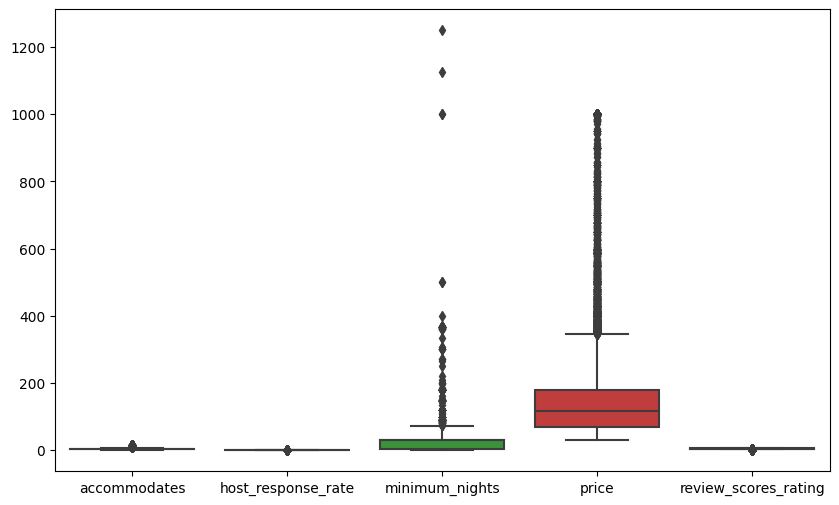

In [9]:
import matplotlib.pyplot as plt

# host_is_super_host is categorical, so presently excluded.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected[['accommodates', 'host_response_rate', 'minimum_nights', 'price', 'review_scores_rating']])
plt.show()

In [10]:
def cap_outliers(series):
    lower_bound = series.quantile(0.01)
    upper_bound = series.quantile(0.99)
    return series.clip(lower=lower_bound, upper=upper_bound)

df_selected['accommodates'] = cap_outliers(df_selected['accommodates'])
df_selected['host_response_rate'] = cap_outliers(df_selected['host_response_rate'])
df_selected['minimum_nights'] = cap_outliers(df_selected['minimum_nights'])
df_selected['price'] = cap_outliers(df_selected['price'])
df_selected['review_scores_rating'] = cap_outliers(df_selected['review_scores_rating'])

/tmp/ipykernel_1786/544305565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['accommodates'] = cap_outliers(df_selected['accommodates'])
/tmp/ipykernel_1786/544305565.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['host_response_rate'] = cap_outliers(df_selected['host_response_rate'])
/tmp/ipykernel_1786/544305565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

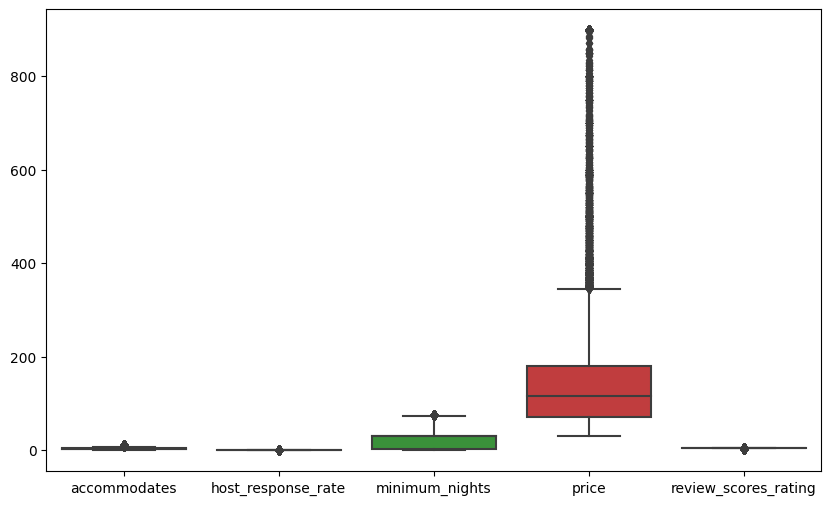

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected[['accommodates', 'host_response_rate', 'minimum_nights', 'price', 'review_scores_rating']])
plt.show()

**Categorical Features**

In [12]:
df_selected.loc[:, 'host_is_superhost'] = df_selected['host_is_superhost'].apply(lambda x: 1 if x else 0)
df_selected.head()

/tmp/ipykernel_1786/798197262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'host_is_superhost'] = df_selected['host_is_superhost'].apply(lambda x: 1 if x else 0)


,accommodates,host_is_superhost,host_response_rate,minimum_nights,price,review_scores_rating
0,1.0,1,0.800000,30.0,150.0,4.70
1,3.0,1,0.090000,1.0,75.0,4.45
2,4.0,1,1.000000,5.0,275.0,5.00
3,2.0,1,1.000000,2.0,68.0,4.21
4,1.0,1,0.906901,2.0,75.0,4.91


**Normalization**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['accommodates', 'host_response_rate', 'minimum_nights', 'price', 'review_scores_rating']
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

df_selected.head()

/tmp/ipykernel_1786/3353394180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])


,accommodates,host_is_superhost,host_response_rate,minimum_nights,price,review_scores_rating
0,-1.072559,1,-6.190192e-01,0.820632,-0.024712,0.021023
1,0.087875,1,-4.730337e+00,-1.113920,-0.577227,-0.521715
2,0.668093,1,5.390984e-01,-0.847085,0.896147,0.672309
3,-0.492342,1,5.390984e-01,-1.047211,-0.628795,-1.042744
4,-1.072559,1,6.428845e-16,-1.047211,-0.577227,0.476924


**Visualize**

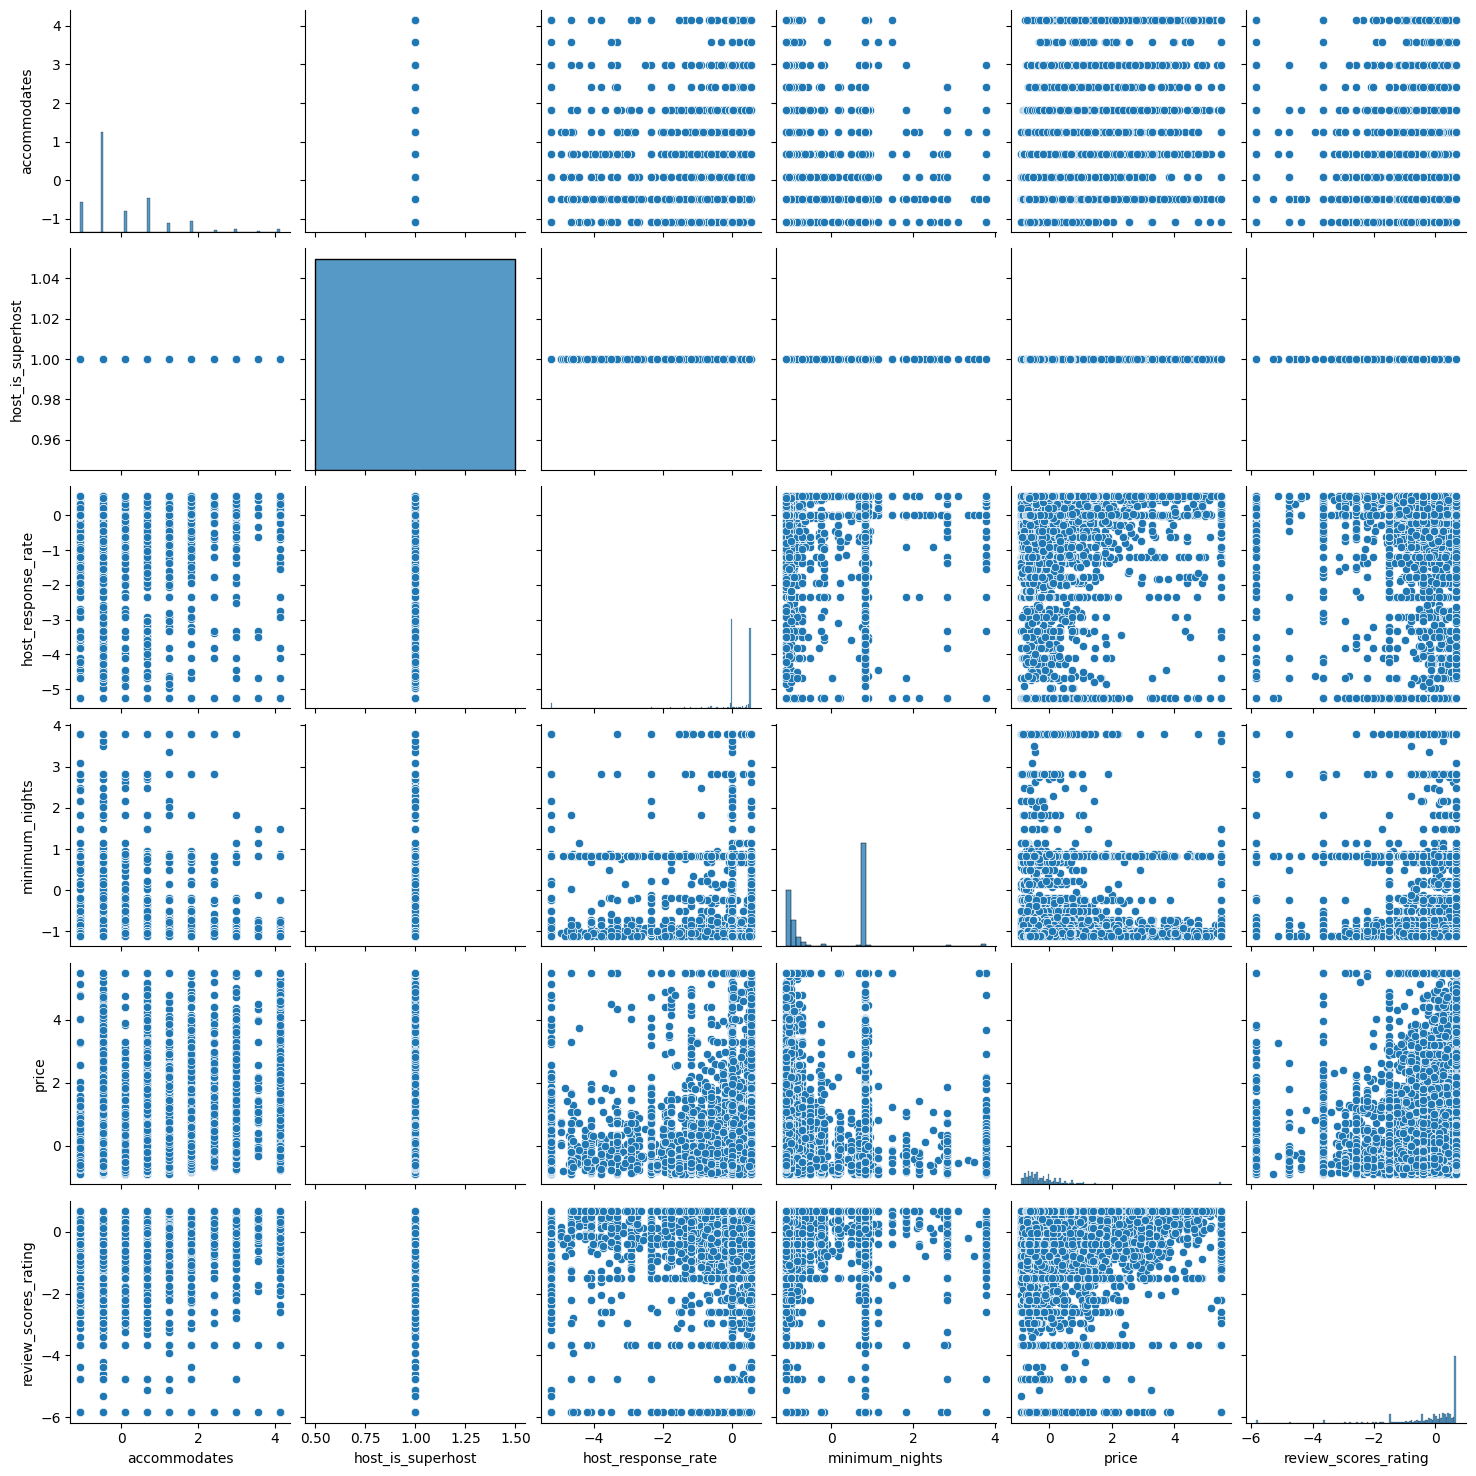

In [14]:
sns.pairplot(df_selected)
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. **Final Feature List**  
After inspecting the data, the features chosen to keep for clustering are:  

* accommodates: Number of guests the listing can accommodate.
* host_is_superhost: Whether the host is a superhost (converted to 0 or 1).
* host_response_rate: The rate at which the host responds to inquiries.
* minimum_nights: Minimum number of nights for booking.
* price: The price per night.
* review_scores_rating: Overall rating score of the listing.  
These features were selected as they represent key aspects of the listings that can help in grouping them into meaningful clusters.  

2. **Data Preparation Techniques**   
To prepare the data for modeling, the following data preparation techniques were used:  

Handling Missing Values: Fill missing values in numerical columns with the mean of the respective column. Drop rows with missing values in categorical columns.  
Outlier Detection and Handling: Detect and handle outliers by capping values at the 1st and 99th percentiles.   
Categorical Encoding: Convert categorical features to numerical values (e.g., host_is_superhost).   
Normalization: Normalize numerical features to ensure they are on a similar scale, which is essential for distance-based clustering algorithms.   

3. **Model Selection**   
The model chosen for this clustering problem is the K-Means Clustering algorithm. This algorithm is suitable because it is straightforward, efficient, and effective for grouping data into distinct clusters based on feature similarity.  

4. **Model Training, Evaluation, and Improvement Plan**  
Model Training:    
Initial Training: Fit the K-Means model to the preprocessed data using an initial guess for the number of clusters, 𝑘.   
Determine Optimal Number of Clusters: Use methods such as the Elbow Method and Silhouette Analysis to determine the optimal number of clusters 𝑘.   

Model Evaluation:  
Silhouette Score: Evaluate the quality of clusters using the Silhouette Score, which measures how similar an object is to its own cluster compared to other clusters.
Cluster Analysis: Analyze the characteristics of each cluster to ensure they are meaningful and well-defined.

Model Improvement:  
Parameter Tuning: Experiment with different values of 𝑘 to find the optimal number of clusters.
Feature Engineering: Experiment with adding or removing features to improve cluster quality.
Algorithm Comparison: If necessary, compare the performance of K-Means with other clustering algorithms (e.g., DBSCAN, Hierarchical Clustering) to see if a different algorithm produces better results.
Implementation Steps:

5. **Visualize the clusters using appropriate visualization techniques.**   
By following this plan, we aim to produce a model that effectively groups Airbnb listings in New York City into meaningful clusters, providing insights that can enhance the guest and host experience on the platform.

<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

---
The elbow method is used to find the optimal number of clusters in a dataset. It involves running the K-Means clustering algorithm on the data for a range of values of k (number of clusters) and plotting the Within-Cluster Sum of Squares (WCSS) for each value of k. 

The WCSS is the sum of the squared distances between each point and the centroid of its cluster. The idea is to choose the value of k at the "elbow point," where the rate of decrease in WCSS slows down significantly.

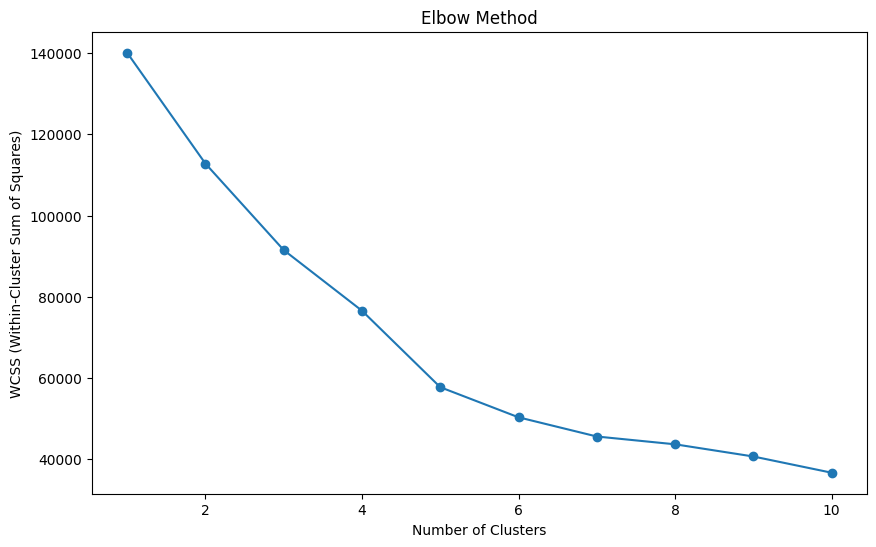

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

---
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 

This measure has a range of [-1, 1], with 1 being good, -1 suggesting the point might be in the wrong cluster, and 0 neutral.

s(i) = b(i)−a(i) / max(a(i),b(i))  
a(i): The mean distance between the sample and all other points in the same cluster. This measures how well the sample is clustered with its own cluster.  
b(i): The mean distance between the sample and all points in the nearest cluster to which it does not belong. This measures how dissimilar the sample is from the nearest cluster


In [17]:
# The elbow method shows us decrease starts at k = 6
k = 6
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(df_selected)

cluster_labels = kmeans.labels_

df_selected['cluster'] = cluster_labels

silhouette_avg = silhouette_score(df_selected[numerical_features], cluster_labels)
print(f'Silhouette Score for k = {k}: {silhouette_avg}')

/tmp/ipykernel_1786/1691061410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = cluster_labels


Silhouette Score for k = 6: 0.3649404853418945


---

Silhouette Score for k = 6: 0.3649404853418945  
The silhouette score is not negative, but not excellent either.

To improve things, we can try to select k based on silhouette score, rather than the elbow method.

In [18]:
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    cluster_labels = kmeans.fit_predict(df_selected[numerical_features])
    silhouette_avg = silhouette_score(df_selected[numerical_features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score for k = {k}: {silhouette_avg}')

Silhouette Score for k = 2: 0.33574809461676314
Silhouette Score for k = 3: 0.29660923661977984
Silhouette Score for k = 4: 0.32710384767364076
Silhouette Score for k = 5: 0.3620664659287832
Silhouette Score for k = 6: 0.3649404853418945
Silhouette Score for k = 7: 0.3543596571987938
Silhouette Score for k = 8: 0.3614519954496945
Silhouette Score for k = 9: 0.3368301063102678
Silhouette Score for k = 10: 0.34288590974028726
Silhouette Score for k = 11: 0.28418300946128144
Silhouette Score for k = 12: 0.28121561052682836
Silhouette Score for k = 13: 0.2828812928816005
Silhouette Score for k = 14: 0.23042383041480974


In [19]:
# +2 because we start clusters from k = 2, k = 0, 1 is meaningless
best_k = silhouette_scores.index(max(silhouette_scores)) + 2 
best_k

6

In [20]:
final_kmeans = KMeans(n_clusters = best_k, random_state = 42)
final_clusters = final_kmeans.fit_predict(df_selected[numerical_features])

df_selected['final_cluster'] = final_clusters

/tmp/ipykernel_1786/2620246063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['final_cluster'] = final_clusters


---
**Visualisation**  
Pair plots and DCA

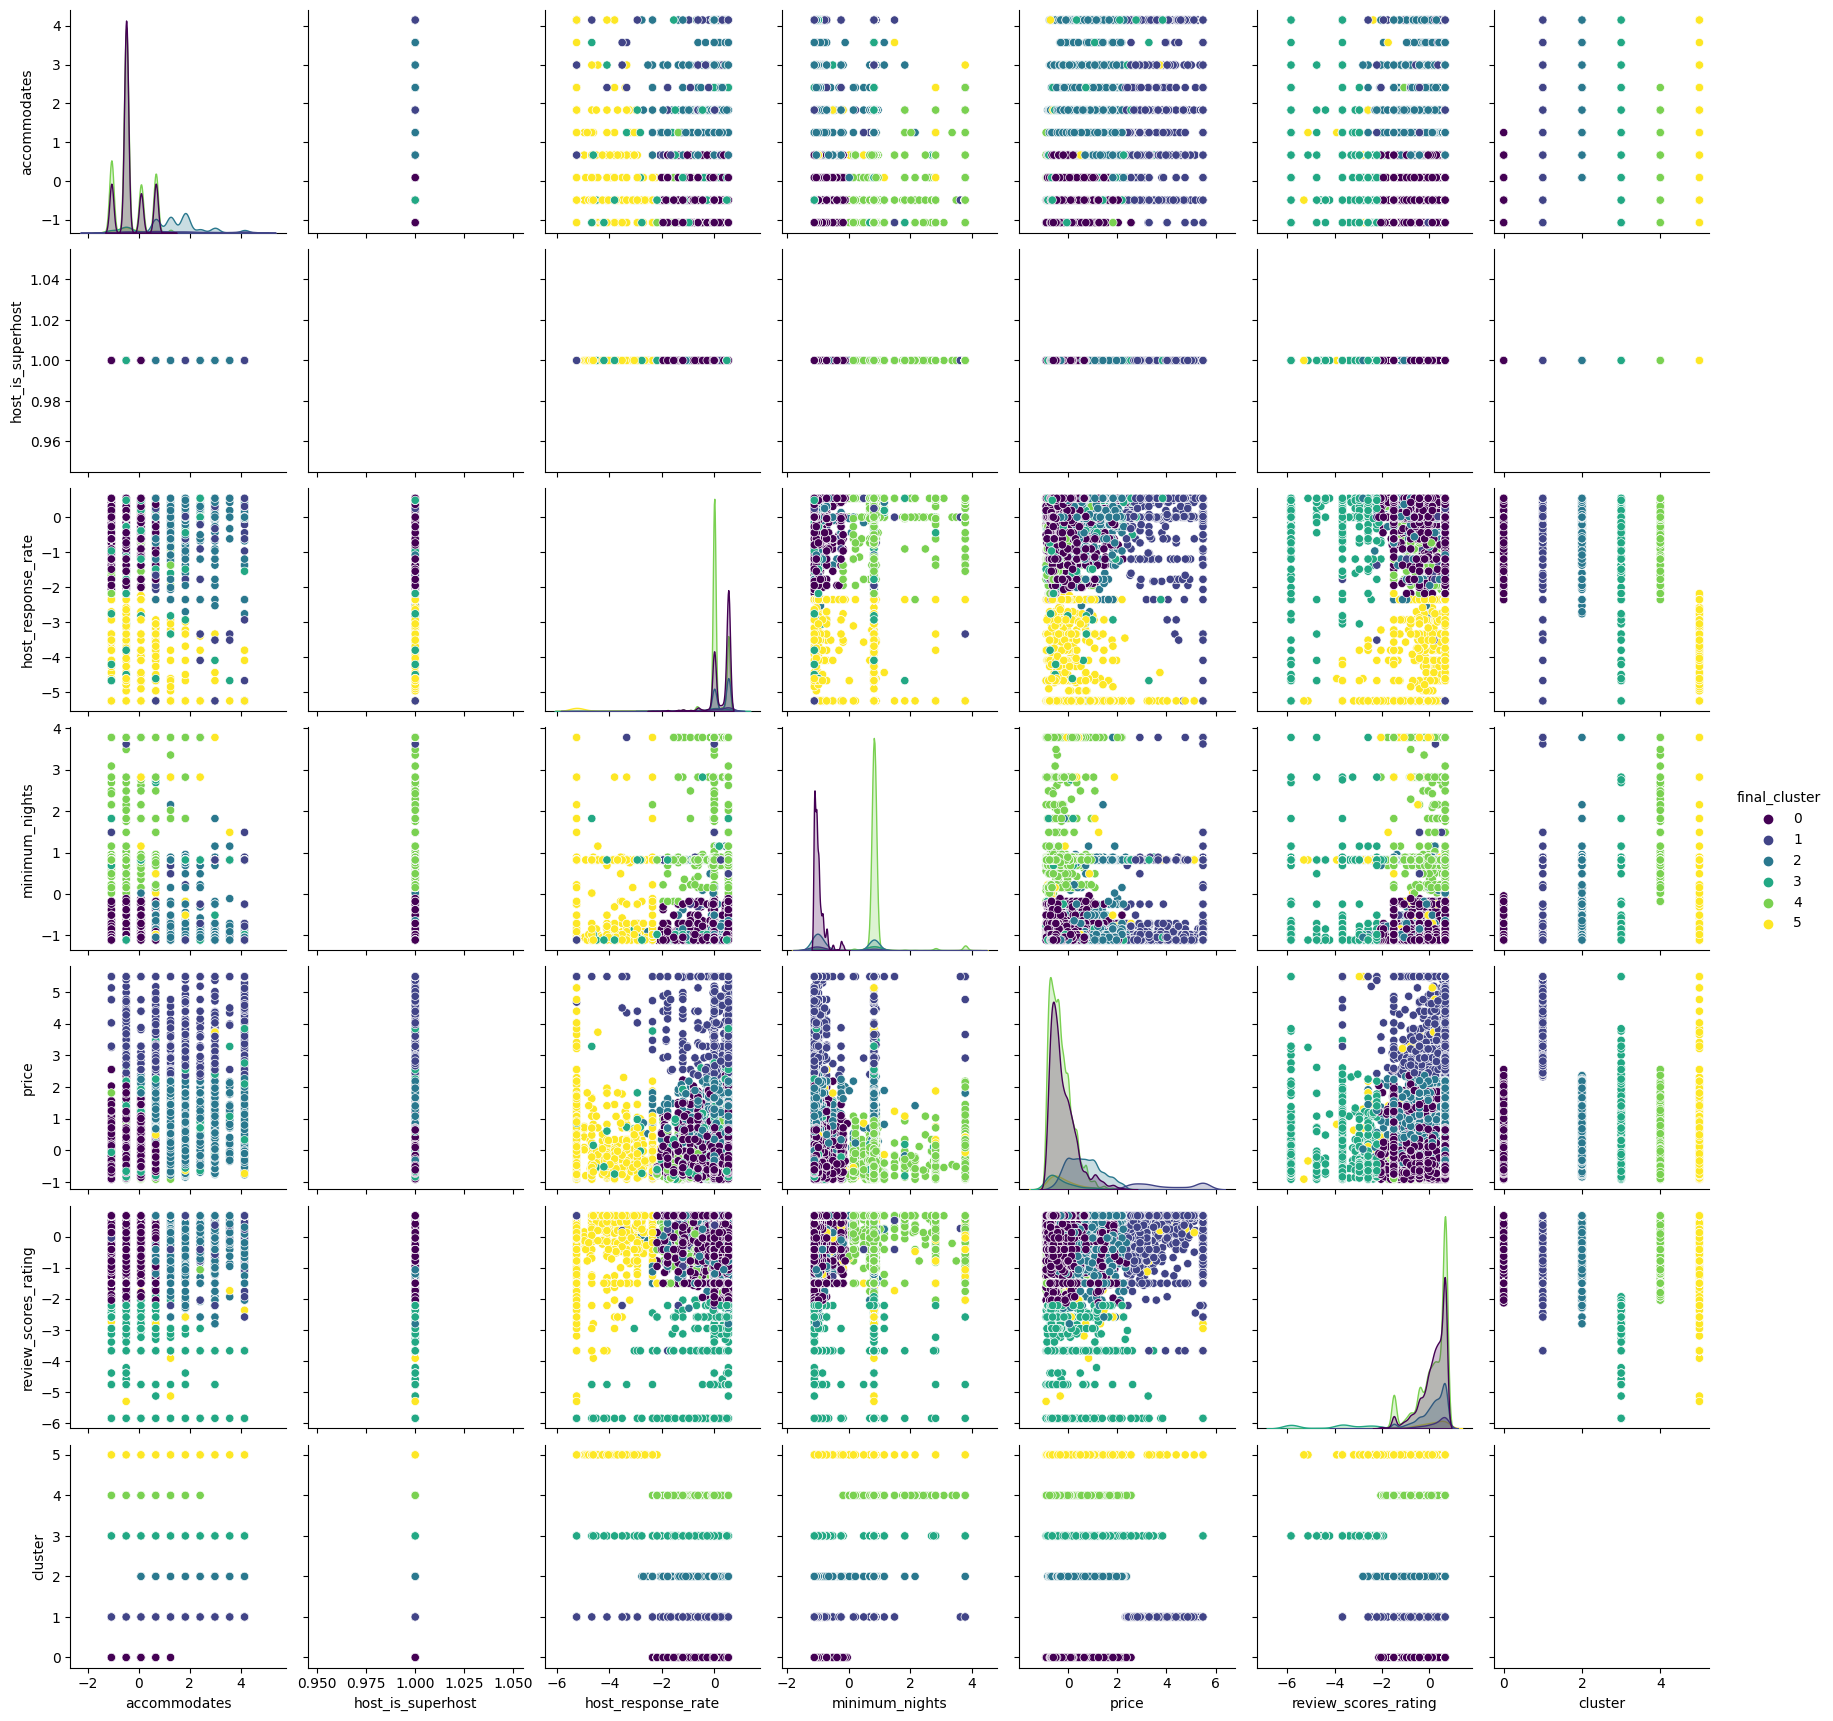

In [21]:
# pair plot
sns.pairplot(df_selected, hue = 'final_cluster', palette = 'viridis', diag_kind = 'kde')
plt.show()

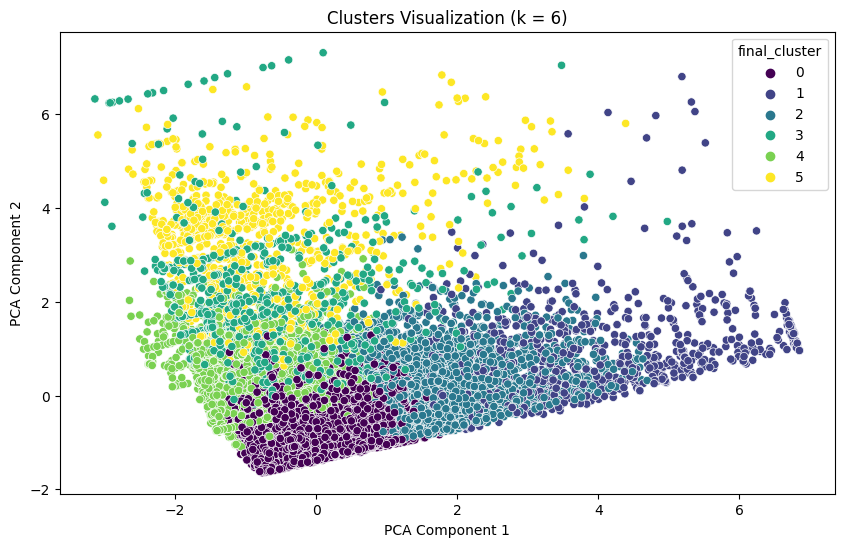

In [22]:
pca = PCA(n_components = 2)
pca_components = pca.fit_transform(df_selected[numerical_features])

plt.figure(figsize = (10, 6))
sns.scatterplot(x = pca_components[:, 0], y = pca_components[:, 1], hue = df_selected['final_cluster'], palette = 'viridis')
plt.title(f'Clusters Visualization (k = {best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

---

**References**  
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/  
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html  
https://www.geeksforgeeks.org/principal-component-analysis-pca/   
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   